In [107]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import os
from PIL import Image
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.utils import compute_class_weight
import matplotlib.pyplot as plt
from collections import Counter
import gc
from keras import backend
from keras.metrics import Recall, Accuracy
import graphviz
import pydot

In [108]:
cnn = pd.read_csv(r"C:\Users\Allen\Desktop\Coding\CSC 466\class_scores_for_cnn.csv")
mlp = pd.read_csv(r"C:\Users\Allen\Desktop\Coding\CSC 466\class_scores_for_cnn.csv")
cnn = cnn.drop(columns=["Unnamed: 0"])
mlp = mlp.drop(columns=["Unnamed: 0"])

In [149]:
per_class_scores_temp = pd.DataFrame.to_dict(cnn)

In [148]:
per_class_scores = list(per_class_scores_temp["class"].values())

ValueError: dictionary update sequence element #0 has length 3226; 2 is required

In [154]:
for i in range(len(per_class_scores)):
    per_class_scores[i] = eval(per_class_scores[i])

In [155]:
recall_scores_val = {}
recall_scores_val[0] = []
recall_scores_val[1] = []
recall_scores_val[2] = []
recall_scores_val[3] = []
recall_scores_train = {}
recall_scores_train[0] = []
recall_scores_train[1] = []
recall_scores_train[2] = []
recall_scores_train[3] = []

for fold_scores in per_class_scores:
    recall_scores_val[0].append(fold_scores[0])
    recall_scores_val[1].append(fold_scores[1])
    recall_scores_val[2].append(fold_scores[2])
    recall_scores_val[3].append(fold_scores[3])
    recall_scores_train[0].append(fold_scores[4])
    recall_scores_train[1].append(fold_scores[5])
    recall_scores_train[2].append(fold_scores[6])
    recall_scores_train[3].append(fold_scores[7])

In [156]:
average_recall_scores_val = {}
average_recall_scores_train = {}

In [157]:
for i in range(4):
    scores = np.array(recall_scores_val[i])
    average_recall_scores_val[i] = np.mean(scores, axis = 0)

In [158]:
for i in range(4):
    scores = np.array(recall_scores_train[i])
    average_recall_scores_train[i] = np.mean(scores, axis = 0)

In [159]:
recall_train = pd.DataFrame.from_dict(average_recall_scores_train, orient = "index").T
recall_train.columns = ["White", "Black", "Asian", "Indian"]
recall_train = recall_train * 100

recall_val = pd.DataFrame.from_dict(average_recall_scores_val, orient = "index").T
recall_val.columns = ["White", "Black", "Asian", "Indian"]
recall_val = recall_val * 100



<Axes: title={'center': 'Mean Training % Correct by Race for CNN (5-fold CV)'}>

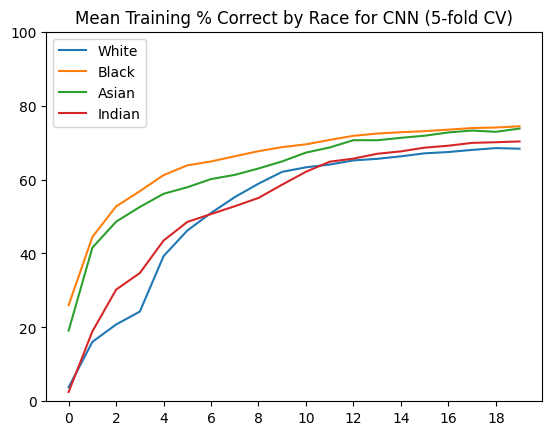

In [161]:
recall_train.plot(xticks = list(range(0, 20, 2)), ylim = (0, 100),
                  title = "Mean Training % Correct by Race for CNN (5-fold CV)")

<Axes: title={'center': 'Mean Validation % Correct by Race for CNN (5-fold CV)'}>

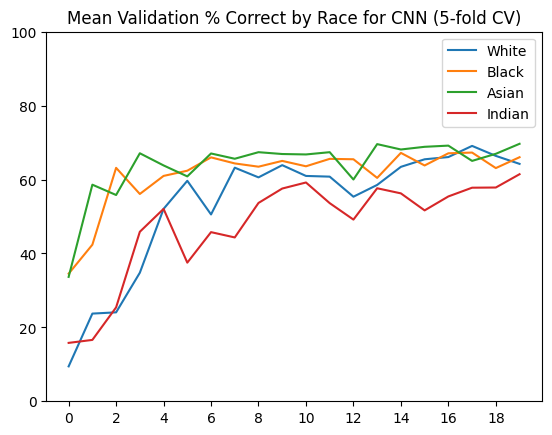

In [162]:
recall_val.plot(xticks = list(range(0, 20, 2)), ylim = (0, 100),
                  title = "Mean Validation % Correct by Race for CNN (5-fold CV)")

In [168]:
train_validation_for_cnn = pd.read_csv(r"C:\Users\Allen\Desktop\Coding\CSC 466\train_validation_for_cnn.csv")
train_validation_for_cnn = train_validation_for_cnn.drop(columns = ["Unnamed: 0"])

<Axes: title={'center': 'Mean CNN Train/Validation by Epoch (5-fold CV)'}>

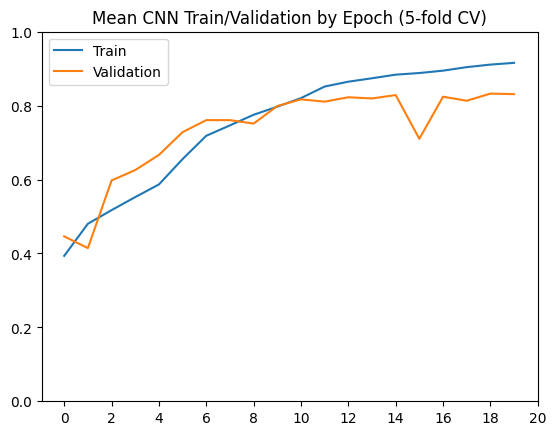

In [178]:
train_validation_for_cnn.plot(xticks = list(range(0, 21, 2)), ylim = (0, 1),
                  title = "Mean CNN Train/Validation by Epoch (5-fold CV)")